In [12]:
import os
import sys
import requests_cache
# Import Code modules
module_path = os.path.abspath(os.path.join('../code'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [13]:
# Con'd import
from data_fetcher import DataFetcher
from endpoint_type import EndpointType
from db_connector import DBConnector
from flusurv_params import *
from fluview_params import *
from gft_params import *

db_connector = DBConnector()

In [16]:
flusurv_param = FluSurvParams(
    epiweeks = ["202001-202017"], 
    regions = [FluSurvRegion.CA]
)
flusurv=DataFetcher.fetch(EndpointType.FLUSURV,param=flusurv_param)
flusurv

,release_date,location,issue,epiweek,lag,rate_age_0,rate_age_1,rate_age_2,rate_age_3,rate_age_4,rate_overall
0,2020-11-06,CA,202044,202001,43,8.6,0.8,1.5,5.7,15.3,4.7
1,2020-11-06,CA,202044,202002,42,4.0,1.2,1.2,5.2,17.4,4.6
2,2020-11-06,CA,202044,202003,41,3.5,1.5,2.6,5.2,12.0,4.4
3,2020-11-06,CA,202044,202004,40,1.5,2.1,1.7,5.5,17.6,4.9
4,2020-11-06,CA,202044,202005,39,3.5,1.5,1.5,5.9,13.0,4.2
5,2020-11-06,CA,202044,202006,38,4.0,1.7,1.3,5.2,14.4,4.3
6,2020-11-06,CA,202044,202007,37,2.0,1.7,1.4,6.5,12.7,4.2
7,2020-11-06,CA,202044,202008,36,5.5,1.0,1.2,5.7,14.8,4.3
8,2020-11-06,CA,202044,202009,35,1.5,0.6,1.7,4.6,11.3,3.5
9,2020-11-06,CA,202044,202010,34,3.0,0.4,0.6,3.2,8.4,2.4


In [9]:
flusuraverage=flusurv.sum()[['rate_age_0','rate_age_1','rate_age_2','rate_age_3','rate_age_4']]/17
flusuraverage

rate_age_0    2.329412
rate_age_1    0.805882
rate_age_2    0.958824
rate_age_3    3.276471
rate_age_4    8.441176
dtype: object

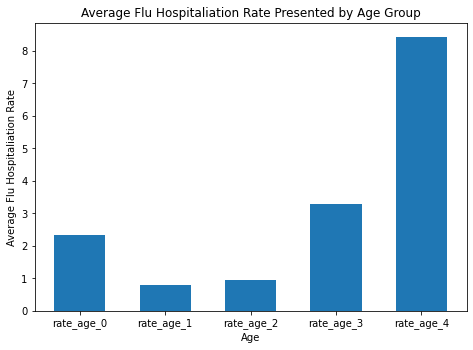

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = ['rate_age_0','rate_age_1','rate_age_2','rate_age_3','rate_age_4']
average_rate  = [2.329412,0.805882,0.958824,3.276471,8.441176]
plt.bar(age, average_rate,
        width = 0.6)
plt.xlabel("Age")
plt.ylabel("Average Flu Hospitaliation Rate")
plt.title("Average Flu Hospitaliation Rate Presented by Age Group")
plt.show()

In this section, we will look at the average influenza hospitalization rates for different age groups in California. The data, FluSurv, will be used to explore this question. Weekly rates of influenza virus positive specimens correspond to "rate_age_0", "rate_age_1", "rate_age_2", "rate_age_3" and "rate_age_4" by age groups of "0-4 years", "5-24 years", "25-64 years" and "≥65 years". Since, this data contains only 17 weeks, we chose "202001-202017" as the time range and used FluSurvRegion.CA to extract the data for California. Then, we found the average influenza hospitalization rate for different age groups over the 17 weeks by summing the influenza hospitalization rates and dividing by 17. After doing this, we used matplotlib to plot the bar chat. From the above graph, we can see that the highest mean influenza Hospitalization Rate is for people over 65 years old at 8.441176, while the lowest mean influenza hospitalization rate is for people between 5-24 years old at 0.805882.